In [16]:
import cv2 # opencv 라이브러리 호출
import numpy as np # numpy 라이브러리 호출 & numpy를 np라고 부르기로 함
from matplotlib import pyplot as plt #matplotlib 라이브러리 내 pyplot 이라는 함수를 가져오기


In [104]:
#영상 읽기
img = cv2.imread('Ryan.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#opencv는 RGB가 아닌 BGR형태로 영상을 가지고 있음
# 따라서 BGR을 RGB로 바꾸어야함!!!

In [105]:
#Average filter
def average_filter(src):    
    src = src.astype(float)
    kernel = np.array([[0,1,0],[1,0,1],[0,1,0]])/4
    res = cv2.filter2D(src,-1, kernel)
    res = res.astype('uint8')
    return res

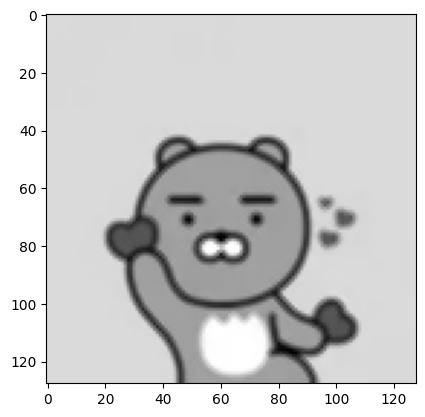

In [106]:
avg_img = average_filter(gray)
plt.imshow(avg_img, cmap='gray')

In [20]:
#Average filter
def average_filter2(src):    
    src = src.astype(float)
    kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
    res = cv2.filter2D(src,-1, kernel)
    res = res.astype('uint8')
    return res

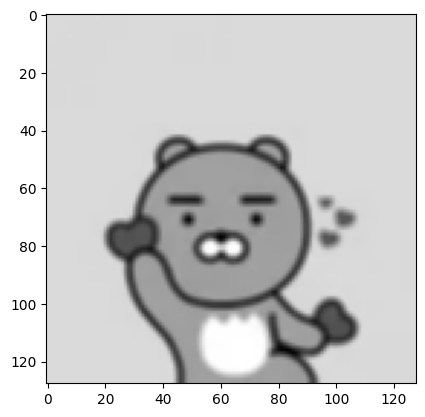

In [21]:
avg_img = average_filter2(gray)
plt.imshow(avg_img, cmap='gray')

In [22]:
def gaussian_filter(src, sigma = 1):
    pi = np.pi
    kernel = np.zeros((3,3), dtype = float)
    for i in range(3):
        for j in range(3):
            kernel[i,j] = 1/(2*sigma**2) * np.exp(-((i-1)**2 + (j-1)**2) / (2*sigma**2))
    kernel = kernel / np.sum(kernel)
    src = src.astype(float)
    res = cv2.filter2D(src,-1,kernel)
    res = res.astype('uint8')
    return res

In [23]:
#Average filter
def median_filter(src):
    res = np.zeros_like(src, dtype='uint8')
    for i in range(len(src)):
        for j in range(len(src[i])):
            res[i,j] = np.median(src[i-1:i+2,j-1:j+2])
    return res

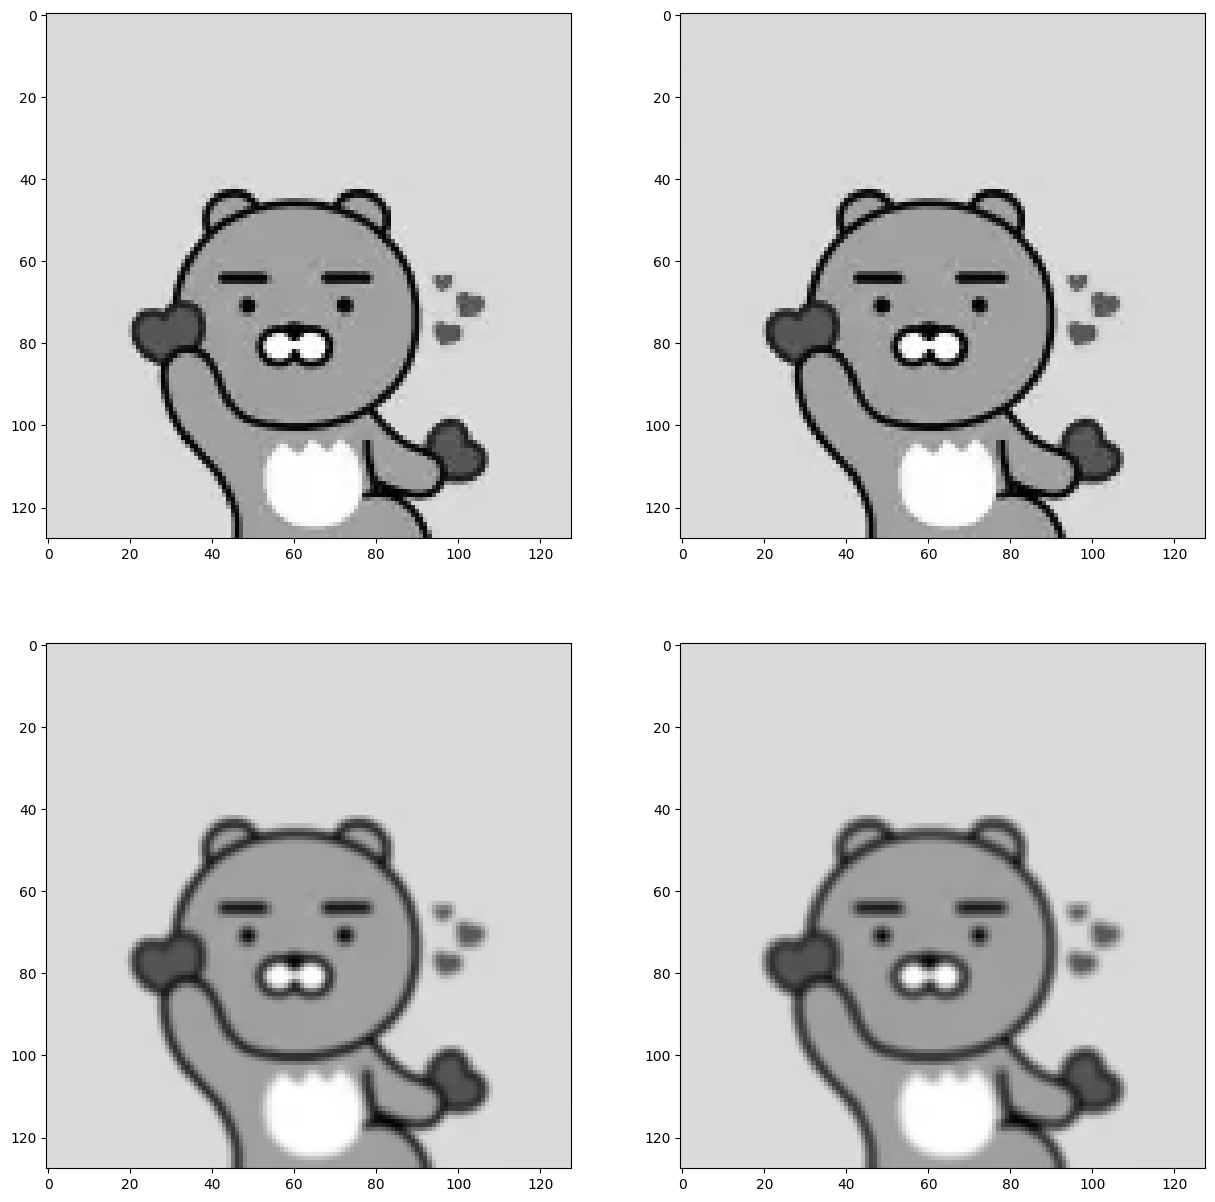

In [24]:
avg_img1 = gaussian_filter(gray, 0.01)
avg_img2 = gaussian_filter(gray, 1)
avg_img3 = gaussian_filter(gray, 100)
f, axarr = plt.subplots(2,2)
f.set_size_inches(15,15)
axarr[0][0].imshow(gray, cmap='gray')
axarr[0][1].imshow(avg_img1, cmap='gray')
axarr[1][0].imshow(avg_img2, cmap='gray')
axarr[1][1].imshow(avg_img3, cmap='gray')

In [25]:
from random import random
#salt and pepper noise

def salt_and_pepper(src, p = 0.01):
    res = np.zeros_like(src, dtype='uint8')
    for i in range(len(src)):
        for j in range(len(src[i])):
            rdn = random()
            if rdn < p: res[i,j] = 0
            elif rdn > 1-p: res[i,j] = 255
            else: res[i,j] = src[i,j]
    return res

In [26]:
#gaussian noise
def gaussian_noise(src, std = 10):
    res = np.zeros_like(src, dtype='uint8')
    for i in range(len(src)):
        for j in range(len(src[i])):
            noise = std * np.random.normal()
            temp = src[i,j] + noise
            temp = np.clip(temp, 0, 255)
            res[i,j] = temp
    return res

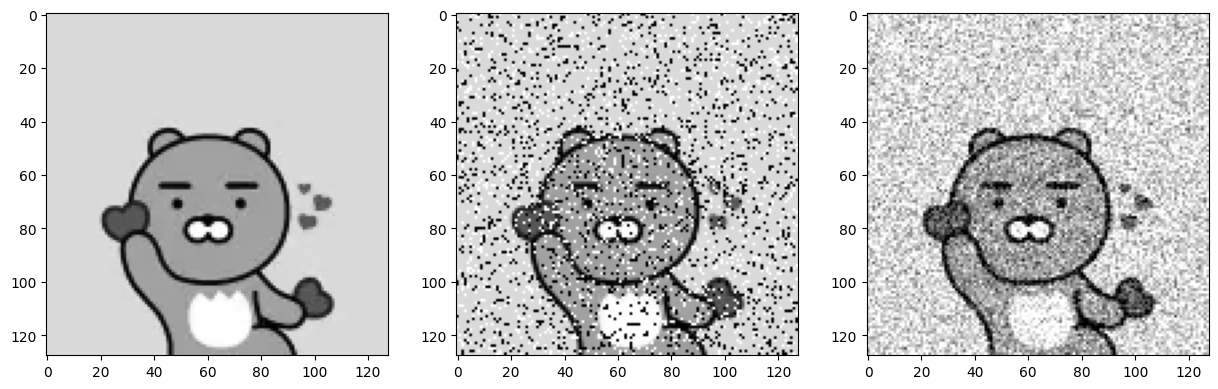

In [27]:
noise_img1 = salt_and_pepper(gray, 0.1)
noise_img2 = gaussian_noise(gray, 40)
f, axarr = plt.subplots(1,3)
f.set_size_inches(15,15)
axarr[0].imshow(gray, cmap='gray')
axarr[1].imshow(noise_img1, cmap='gray')
axarr[2].imshow(noise_img2, cmap='gray')

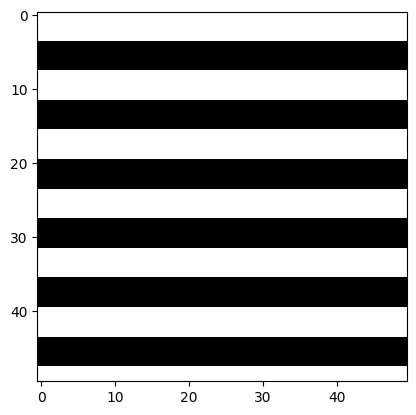

In [28]:
test = np.zeros((50,50), dtype='uint8')
for i in range(50):
    for j in range(50):
        if i%8 < 4:
            test[i,j] = 255
plt.imshow(test, cmap='gray')

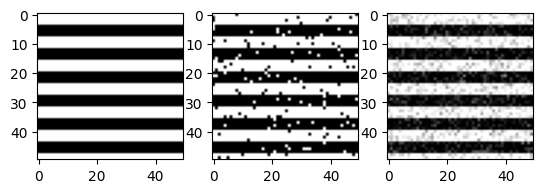

In [29]:
noise1 = salt_and_pepper(test, 0.05)
noise2 = gaussian_noise(test, 40)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(test, cmap='gray')
axarr[1].imshow(noise1, cmap='gray')
axarr[2].imshow(noise2, cmap='gray')

/Users/joseongjin/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/joseongjin/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


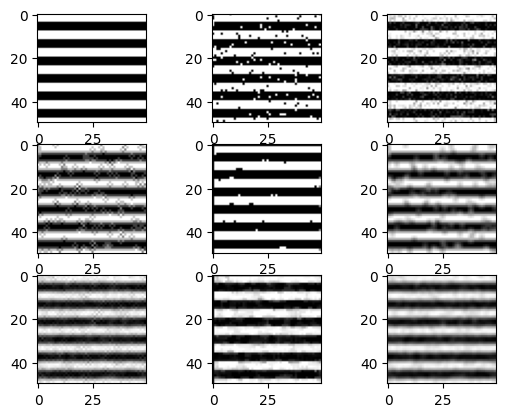

In [30]:
average_noise1 = average_filter(noise1)
average_noise2 = average_filter(noise2)
median_noise1 = median_filter(noise1)
median_noise2 = median_filter(noise2)
gaussian_noise1 = gaussian_filter(noise1)
gaussian_noise2 = gaussian_filter(noise2)
f, axarr = plt.subplots(3,3)
axarr[0][0].imshow(test, cmap='gray')
axarr[0][1].imshow(noise1, cmap='gray')
axarr[0][2].imshow(noise2, cmap='gray')
axarr[1][0].imshow(average_noise1, cmap='gray')
axarr[1][1].imshow(median_noise1, cmap='gray')
axarr[1][2].imshow(gaussian_noise1, cmap='gray')
axarr[2][0].imshow(average_noise2, cmap='gray')
axarr[2][1].imshow(median_noise2, cmap='gray')
axarr[2][2].imshow(gaussian_noise2, cmap='gray')

In [31]:
import math
def PSNR(img1, img2):
    img1 = img1.astype(float) / 255.
    img2 = img2.astype(float) / 255.
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return 1000000000000
    return (10 * math.log10(1. / mse))

In [32]:
avg_no1 = PSNR(test, average_noise1)
med_no1 = PSNR(test, median_noise1)
gas_no1 = PSNR(test, gaussian_noise1)
avg_no2 = PSNR(test, average_noise2)
med_no2 = PSNR(test, median_noise2)
gas_no2 = PSNR(test, gaussian_noise2)
print('avg_no1 : ', avg_no1)
print('med_no1 : ', med_no1)
print('gas_no1 : ', gas_no1)
print('avg_no2 : ', avg_no2)
print('med_no2 : ', med_no2)
print('gas_no2 : ', gas_no2)

avg_no1 :  12.910606652826509
med_no1 :  13.882849386157133
gas_no1 :  12.975573251160828
avg_no2 :  13.670681436354563
med_no2 :  13.990421529885213
gas_no2 :  13.219244873244056


In [33]:
def bilateral_filter(src, sigma1 = 1, sigma2 = 1):
    pi = np.pi
    res = np.zeros_like(src, dtype=float)
    kernel1 = np.zeros((3,3), dtype = float)
    kernel2 = np.zeros((3,3), dtype = float)
    for i in range(3):
        for j in range(3):
            kernel1[i,j] = 1/(2*sigma1**2) * np.exp(-((i-1)**2 + (j-1)**2) / (2*sigma1**2))
    for i in range(1, len(src)-1):
        for j in range(1, len(src[i])-1):
            dif = np.abs(src[i-1:i+2, j-1:j+2].astype(float) - src[i,j].astype(float))
            kernel2 = 1 / (2*pi*sigma2**2) * np.exp(-dif / (2*sigma2**2))
            weight = kernel1*kernel2
            weight = weight / np.sum(weight)
            res[i,j] = np.sum(src[i-1:i+2, j-1:j+2] * weight)
    res = res.astype('uint8')
    return res

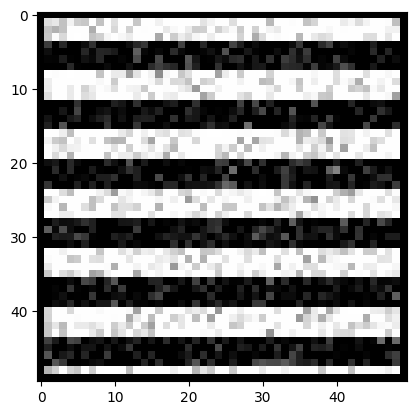

In [34]:
bil_img = bilateral_filter(noise2)
plt.imshow(bil_img, cmap='gray')

In [35]:
from skimage.metrics import structural_similarity as ssim
(score1, diff1) = ssim(test, gaussian_noise2, full=True)
(score2, diff2) = ssim(test, bil_img, full=True)
print(score1)
print(score2)

0.8626050470880283
0.9484908561471302


In [36]:
def laplacian_filter(src):
    src = src.astype(float)
    kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]], dtype=float)
    res = cv2.filter2D(src, -1, kernel)
    res = res.astype(float)
    
    return res

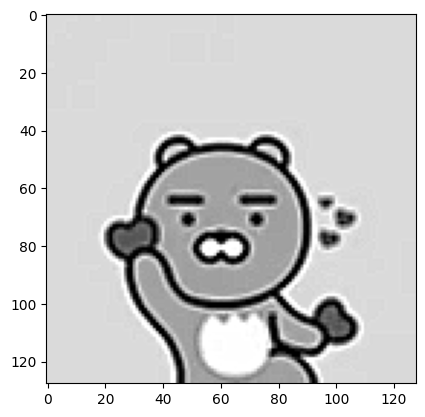

In [56]:
laplacian_img = laplacian_filter(avg_img3)
res = np.clip(avg_img3 + 1.5 * laplacian_img, 0, 255)
plt.imshow(res, cmap='gray')

In [109]:
import math
def gamma_correction(src, gamma = 1):
    res = np.zeros_like(src, dtype='float')
    res = 255*((src.astype(float)/255)**gamma)
    return res.astype('uint8')
            

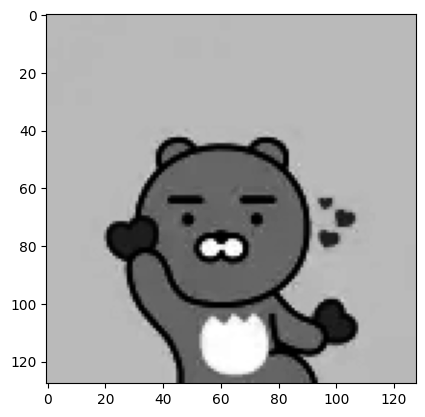

In [112]:
plt.imshow(gamma_correction(gray, 2), cmap='gray')

In [107]:
def simple_multimplcation(src, mul = 1):
    res = np.zeros_like(src, dtype='float')
    
    res = np.clip(src.astype(float)*mul,0,255)
    return res.astype('uint8')

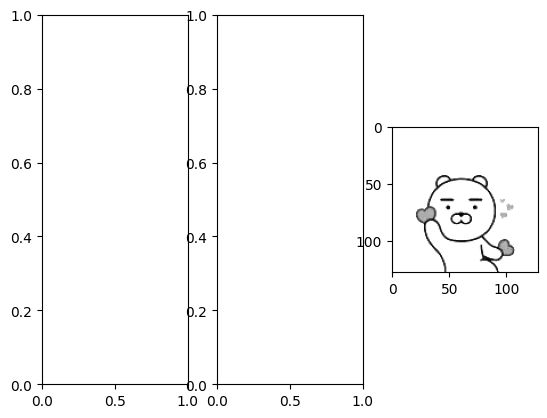

In [108]:
f, axarr = plt.subplots(1, 3)
axarr[0] = plt.imshow(gray, vmin=0,vmax=255, cmap='gray')
axarr[1] = plt.imshow(simple_multimplcation(gray, 0.5), vmin=0,vmax=255, cmap='gray')
axarr[2] = plt.imshow(simple_multimplcation(gray, 2), vmin=0,vmax=255, cmap='gray')